In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import joblib
import pickle

In [ ]:


columns=['User','Activity','Time Stamp','x-axis','y-axis','z-axis']
df=pd.read_csv('/content/drive/My Drive/WISDM_ar_v1.1_raw.txt',header=None,names=columns)
df['z-axis']=df['z-axis'].replace(';','',regex=True)
df['z-axis']=df['z-axis'].astype(float)

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(1098203, 6)

In [ ]:
df['Activity'].value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: Activity, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   User        1098203 non-null  int64  
 1   Activity    1098203 non-null  object 
 2   Time Stamp  1098203 non-null  int64  
 3   x-axis      1098203 non-null  float64
 4   y-axis      1098203 non-null  float64
 5   z-axis      1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


In [ ]:
df=df.drop(['User','Time Stamp'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Label']=le.fit_transform(df.Activity)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098203 entries, 0 to 1098203
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Activity  1098203 non-null  object 
 1   x-axis    1098203 non-null  float64
 2   y-axis    1098203 non-null  float64
 3   z-axis    1098203 non-null  float64
 4   Label     1098203 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 50.3+ MB


In [ ]:
le.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [ ]:
df.Activity.value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: Activity, dtype: int64

In [ ]:
424397 * .9


381957.3

In [ ]:
Walking=df[df['Activity']=='Walking'].head(318297)
Jogging=df[df['Activity']=='Jogging'].head(256632)
Upstairs=df[df['Activity']=='Upstairs'].head(92151)
Downstairs=df[df['Activity']=='Downstairs'].head(75320)
Sitting=df[df['Activity']=='Sitting'].head(44954)
Standing=df[df['Activity']=='Standing'].head(36296)
Walking2=df[df['Activity']=='Walking'].tail(424397-318297)
Jogging2=df[df['Activity']=='Jogging'].tail(342176-256632)
Upstairs2=df[df['Activity']=='Upstairs'].tail(122869-92151)
Downstairs2=df[df['Activity']=='Downstairs'].tail(100427-75320)
Sitting2=df[df['Activity']=='Sitting'].tail(59939-44954)
Standing2=df[df['Activity']=='Standing'].tail(48395-36296)


In [ ]:
training_data=pd.DataFrame()
test_data=pd.DataFrame()
train=training_data.append([Walking,Jogging,Upstairs,Downstairs,Sitting,Standing])
test=test_data.append([Walking2,Jogging2,Upstairs2,Downstairs2,Sitting2,Standing2])




In [ ]:
train

,Activity,x-axis,y-axis,z-axis,Label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5
...,...,...,...,...,...
830972,Standing,4.020000,8.240000,0.300000,3
830973,Standing,4.020000,8.350000,0.340000,3
830974,Standing,3.950000,8.280000,0.110000,3
830975,Standing,3.980000,8.500000,0.040000,3


In [ ]:
test

,Activity,x-axis,y-axis,z-axis,Label
844883,Walking,-1.76,13.63,3.02,5
844884,Walking,2.96,10.99,1.33,5
844885,Walking,-0.61,4.99,1.92,5
844886,Walking,-0.69,4.94,1.08,5
844887,Walking,-2.34,3.68,0.80,5
...,...,...,...,...,...
1095665,Standing,-4.99,8.39,-0.38,3
1095666,Standing,-5.13,8.24,-0.42,3
1095667,Standing,-4.56,8.50,-0.89,3
1095668,Standing,-4.48,8.54,-1.08,3


In [ ]:

Xtrain=train[['x-axis','y-axis','z-axis','Label']]
Xtest=test[['x-axis','y-axis','z-axis','Label']]


In [ ]:
Ytrain=train['Activity']
Ytest=test['Activity']

In [ ]:
# x=scaler1.fit_transform(x)
Xtrain


,x-axis,y-axis,z-axis,Label
597,0.844462,8.008764,2.792171,5
598,1.116869,8.621680,3.786457,5
599,-0.503953,16.657684,1.307553,5
600,4.794363,10.760075,-1.184970,5
601,-0.040861,9.234595,-0.694638,5
...,...,...,...,...
830972,4.020000,8.240000,0.300000,3
830973,4.020000,8.350000,0.340000,3
830974,3.950000,8.280000,0.110000,3
830975,3.980000,8.500000,0.040000,3


In [ ]:
Ytrain

597        Walking
598        Walking
599        Walking
600        Walking
601        Walking
            ...   
830972    Standing
830973    Standing
830974    Standing
830975    Standing
830976    Standing
Name: Activity, Length: 823650, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtrain[['x-axis','y-axis','z-axis']]=scaler.fit_transform(Xtrain[['x-axis','y-axis','z-axis']])
Xtest[['x-axis','y-axis','z-axis']]=scaler.fit_transform(Xtest[['x-axis','y-axis','z-axis']])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [ ]:
Ytrain=np.array(Ytrain)
Ytest=np.array(Ytest)

In [ ]:

hop_size = 30
from scipy import stats

In [ ]:
Ytrain

array(['Walking', 'Walking', 'Walking', ..., 'Standing', 'Standing',
       'Standing'], dtype=object)

In [ ]:
def get_frame1(df1,df2, hop_size):
  N_FEATURES = 3

  frames=[]
  label1=[]
  inte=200
  label2=[]

  for i in range(inte, len(df1),hop_size):
    x=df1['x-axis'].values[i-inte:i]
    y=df1['y-axis'].values[i-inte:i]
    z=df1['z-axis'].values[i-inte:i]

    
    label3=stats.mode(df2[i-inte:i])[0][0]
    label4=stats.mode(df1['Label'][i-inte:i])[0][0]

    frames.append([x,y,z])
    label1.append(label3)
    label2.append(label4)


  return frames, label1,label2

In [ ]:
Xtrain,ytrain,ytr=get_frame1(Xtrain,Ytrain,hop_size)
Xtest,ytest,yts=get_frame1(Xtest,Ytest,hop_size )

In [ ]:
ytrain=np.array(pd.get_dummies(ytrain))
ytest=np.array(pd.get_dummies(ytest))

In [ ]:
ytest.shape,ytrain.shape

((9146, 6), (27449, 6))

In [ ]:
Xtest=np.array(Xtest)

Xtest.shape

(9146, 3, 200)

In [ ]:
Xtrain=np.array(Xtrain)

In [ ]:
ytrain

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
Xtrain.shape

(27449, 3, 200)

In [ ]:
ytrain

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
Xtrain

array([[[-0.01176917,  0.02929127, -0.21501836, ...,  0.20174512,
         -0.23144253, -0.26018484],
        [ 0.06786175,  0.15840392,  1.34551153, ..., -0.14742722,
         -0.58806556,  0.16846419],
        [ 0.50383578,  0.70837034,  0.19843489, ..., -0.55245909,
         -0.44038537, -0.21343606]],

       [[-0.34025269,  0.06213961, -0.7693343 , ..., -0.30124529,
         -1.0403332 , -0.24376066],
        [-1.08705322,  1.57890924,  1.28515033, ...,  0.65537957,
          1.03565651, -0.67458359],
        [-0.62250517,  2.75091424,  0.17321831, ..., -0.25266188,
          0.37214918, -0.21343606]],

       [[-0.09183703,  0.55486495, -0.30124529, ..., -0.38131314,
         -0.28892716, -1.30517311],
        [ 0.19864487,  0.80225895,  0.96724688, ..., -0.75908954,
          1.04169264,  1.41392131],
        [-0.07894759,  0.22925516, -0.91389694, ..., -0.33951901,
          2.00282207, -0.053731  ]],

       ...,

       [[ 0.18350991,  0.23626611,  0.32971994, ...,  0.4503055

In [ ]:
ytr=np.array(ytr)
yts=np.array(yts)


In [ ]:
Xtest.shape,yts.shape,ytest.shape

((9146, 3, 200), (9146,), (9146, 6))

In [ ]:
Xtrain.shape,ytr.shape,ytrain.shape

((27449, 3, 200), (27449,), (27449, 6))

In [ ]:
Xtrain=Xtrain.reshape(27449,200,3)
Xtest=Xtest.reshape(9146,200,3)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,Flatten,MaxPool2D

In [ ]:
Xtrain=Xtrain.reshape(10294,200,3,1)
Xtest=Xtest.reshape(3430,200,3,1)
model=Sequential()

model.add(Conv2D(filters=32,padding='same',activation='relu',kernel_size=(3,3),input_shape=(200,3,1)))

model.add(Conv2D(filters=64,padding='same',activation='relu',kernel_size=(3,3)))
model.add(Dropout(.2))

model.add(Conv2D(filters=64,padding='same',activation='relu',kernel_size=(3,3)))
model.add(Conv2D(filters=64,padding='same',activation='relu',kernel_size=(3,3)))
model.add(MaxPool2D(padding='valid',pool_size=(2,2)))
model.add(Dropout(.2))
model.add(Conv2D(filters=128,padding='same',activation='relu',kernel_size=(3,3)))
model.add(Conv2D(filters=128,padding='same',activation='relu',kernel_size=(3,3)))
model.add(Conv2D(filters=128,padding='same',activation='relu',kernel_size=(3,3)))
model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=,activation='relu'))


In [ ]:


model=Sequential()
model.add(LSTM(units=32,activation='relu',input_shape=(200,3),return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(units=64,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=6,activation='relu'))
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 200, 32)           4608      
_________________________________________________________________
dropout_4 (Dropout)          (None, 200, 32)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 390       
Total params: 29,830
Trainable params: 29,830
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(Xtrain,ytrain,epochs=20,validation_data=(Xtest,ytest),batch_size=32)


Epoch 1/20
858/858 [==============================] - 439s 512ms/step - loss: 0.3795 - accuracy: 0.5157 - val_loss: 0.6381 - val_accuracy: 0.4379
Epoch 2/20
858/858 [==============================] - 444s 518ms/step - loss: 1.3340 - accuracy: 0.3771 - val_loss: 2.5708 - val_accuracy: 0.0915
Epoch 3/20
858/858 [==============================] - 444s 517ms/step - loss: 2.5708 - accuracy: 0.0915 - val_loss: 2.5708 - val_accuracy: 0.0915
Epoch 4/20
497/858 [================>.............] - ETA: 3:01 - loss: 2.5708 - accuracy: 0.0920

In [ ]:
h=history.history
h

{'accuracy': [0.4987371265888214,
  0.5626578330993652,
  0.5765494704246521,
  0.6753448843955994,
  0.6737905740737915,
  0.6715562343597412,
  0.673207700252533,
  0.7020594477653503,
  0.7599572539329529,
  0.7610258460044861,
  0.7817174792289734,
  0.7840489745140076,
  0.7860890030860901,
  0.7780260443687439,
  0.7797746062278748,
  0.7848260998725891,
  0.787837564945221,
  0.7749174237251282,
  0.7868661284446716,
  0.7906547784805298],
 'loss': [4.885195732116699,
  4.134171485900879,
  4.406840801239014,
  3.6983420848846436,
  2.552517890930176,
  2.516167163848877,
  3.9025964736938477,
  3.652719497680664,
  3.486544370651245,
  3.4653422832489014,
  3.3395299911499023,
  3.314903974533081,
  3.3126039505004883,
  3.3748185634613037,
  3.3486576080322266,
  3.29931640625,
  3.299184799194336,
  3.40999698638916,
  3.3306047916412354,
  3.278428316116333],
 'val_accuracy': [0.5644314885139465,
  0.7037900686264038,
  0.6833819150924683,
  0.7020407915115356,
  0.721574366

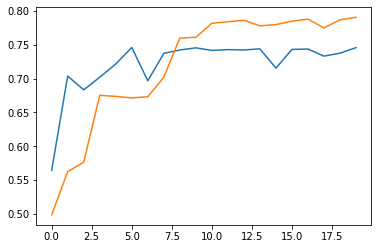

In [ ]:
plt.plot(h['val_accuracy'])
plt.plot(h['accuracy'])

ytrain

In [ ]:
ypred=model.predict_classes(Xtest)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
ypred

array([5, 5, 5, ..., 3, 3, 3])

In [ ]:
yts

array([5, 5, 5, ..., 3, 3, 3])

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f393b4aad68>)

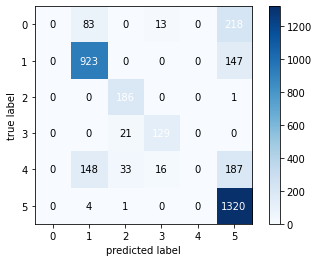

In [ ]:
cm=confusion_matrix(yts,ypred)
plot_confusion_matrix(cm,colorbar=True)

In [ ]:
le.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [ ]:
model.save('Human_Activity_Model96.h5')